# Diamond Price Prediction

The aim of this analysis is to predict the price of diamonds based on their characteristics. The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset contains 53940 observations and 10 variables. The variables are as follows:


|Column Name|Description|
|-----------|-----------|
|carat|Weight of the diamond|
|cut|Quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|Diamond colour, from J (worst) to D (best)|
|clarity|How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|Length in mm|
|y|Width in mm|
|z|Depth in mm|
|depth|Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table|Width of top of diamond relative to widest point (43--95)|
|price|Price in US dollars (326--18,823)|


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Some Numerical Information about the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
df.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

## Data Visualization 

In [3]:
# Define list of Continuous columns Names
continuous = ['price', 'carat']

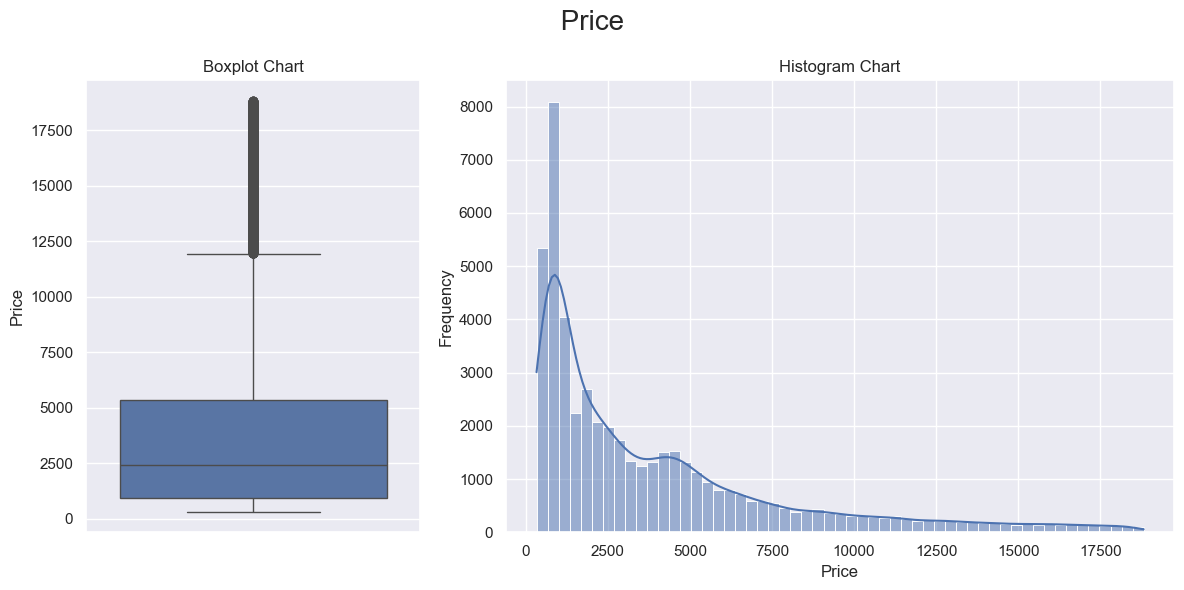

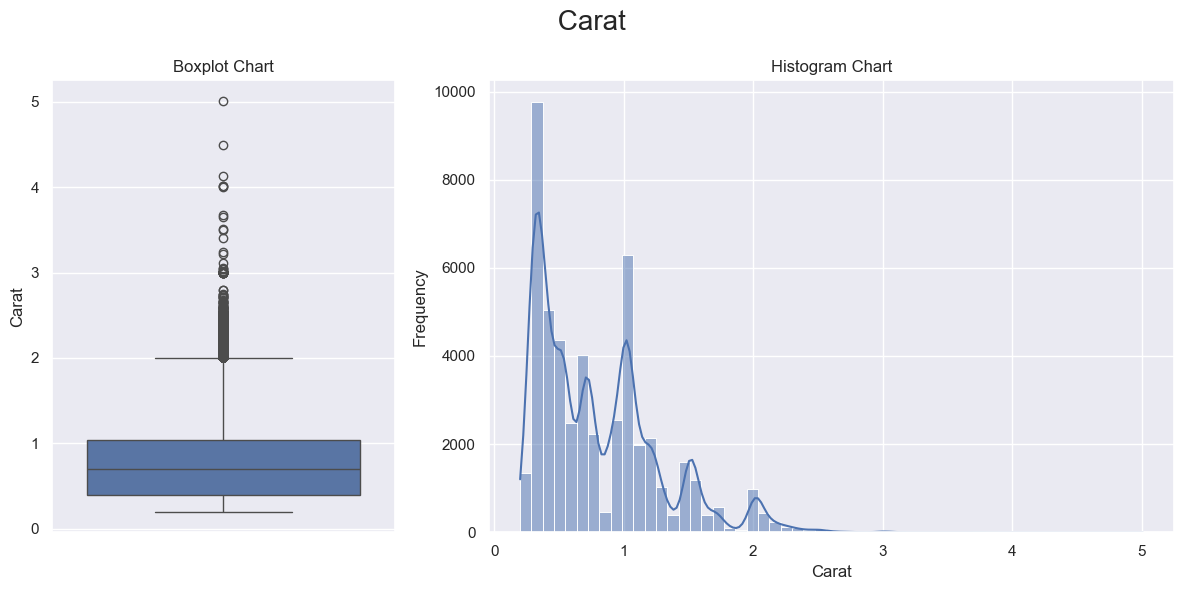

In [4]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti)    

In [6]:
categorical = ['cut', 'color', 'clarity']

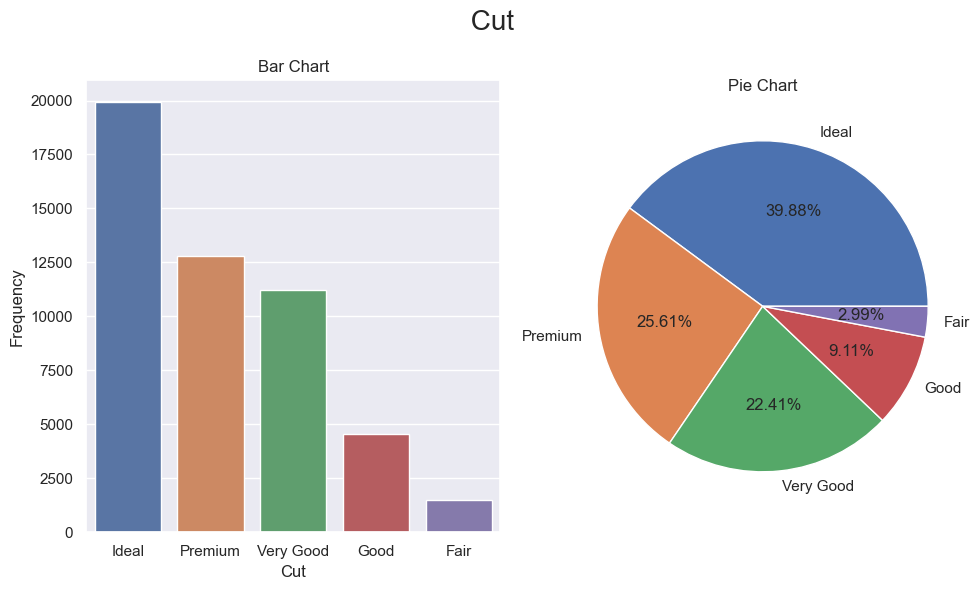

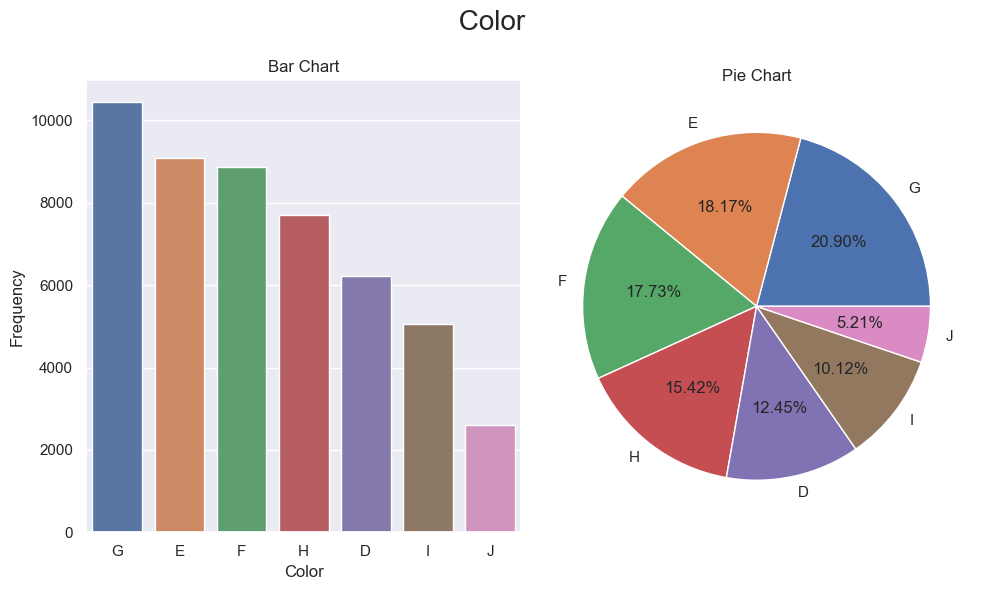

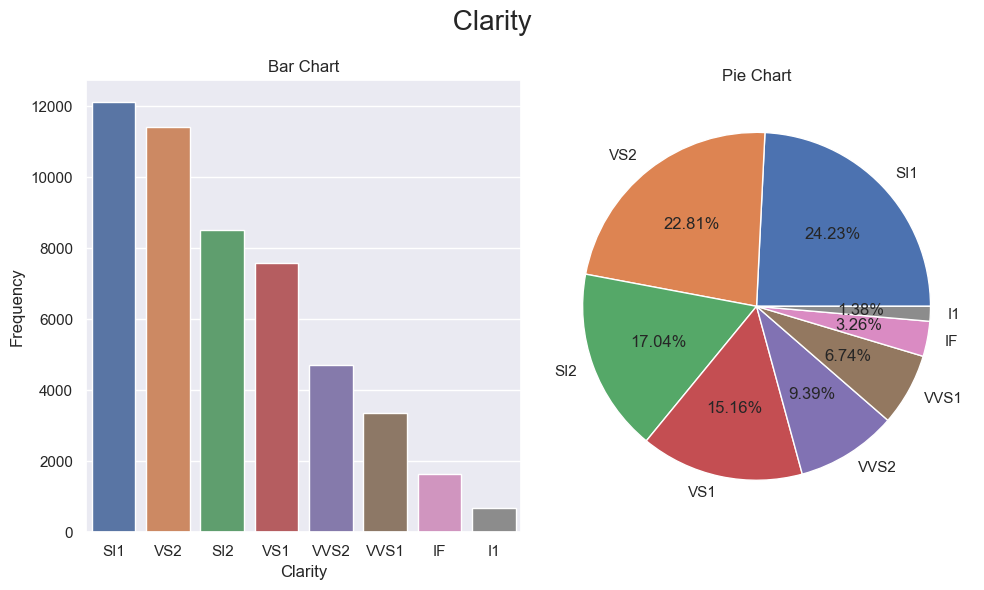

In [7]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)

    plt.tight_layout()    
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

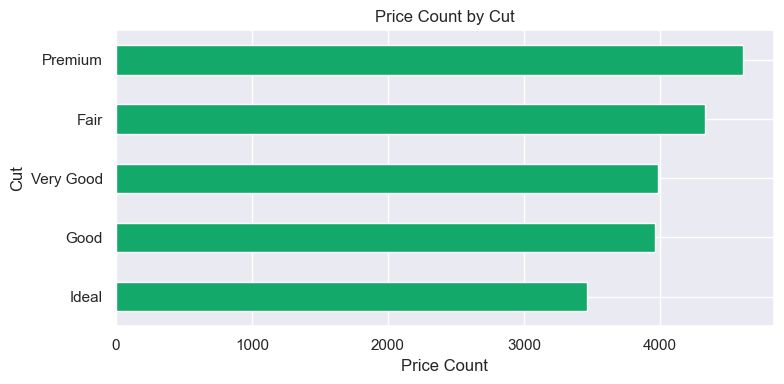

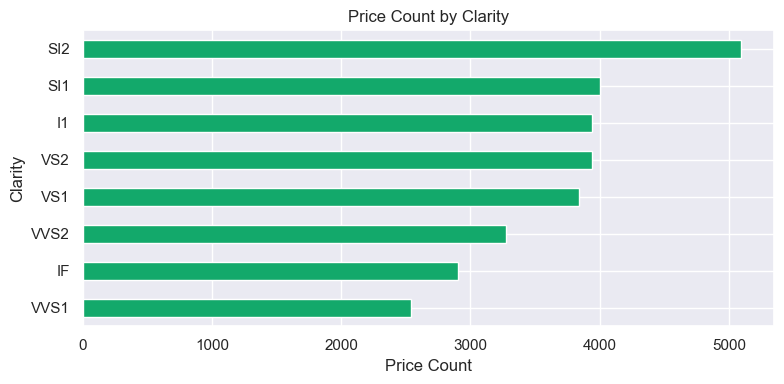

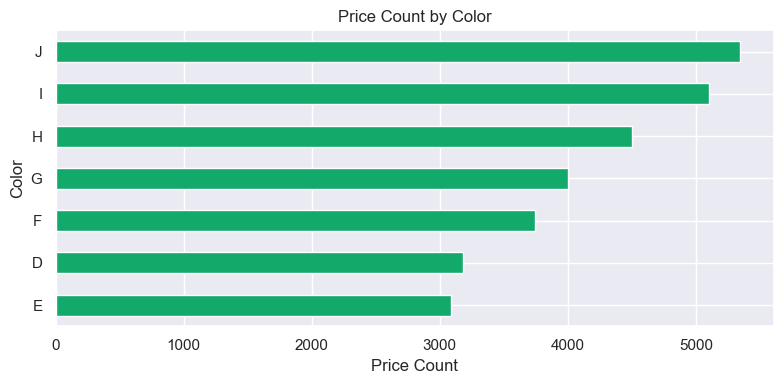

In [5]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.sort_values(ascending=True, inplace=True)
    barh.plot(kind='barh',  color = '#13a96b', figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

bar_plot('cut', 'price', df)
bar_plot('clarity', 'price', df)
bar_plot('color', 'price', df)

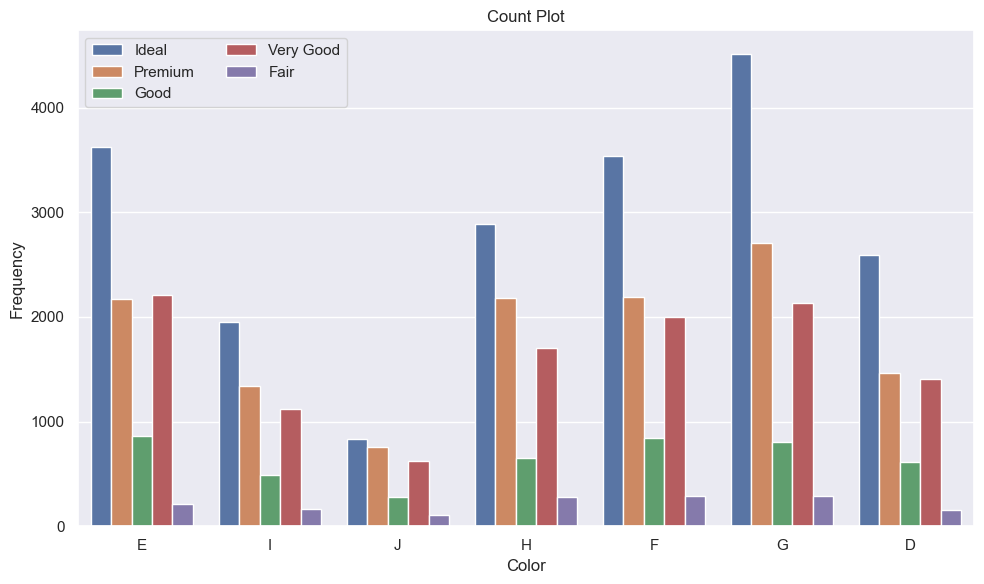

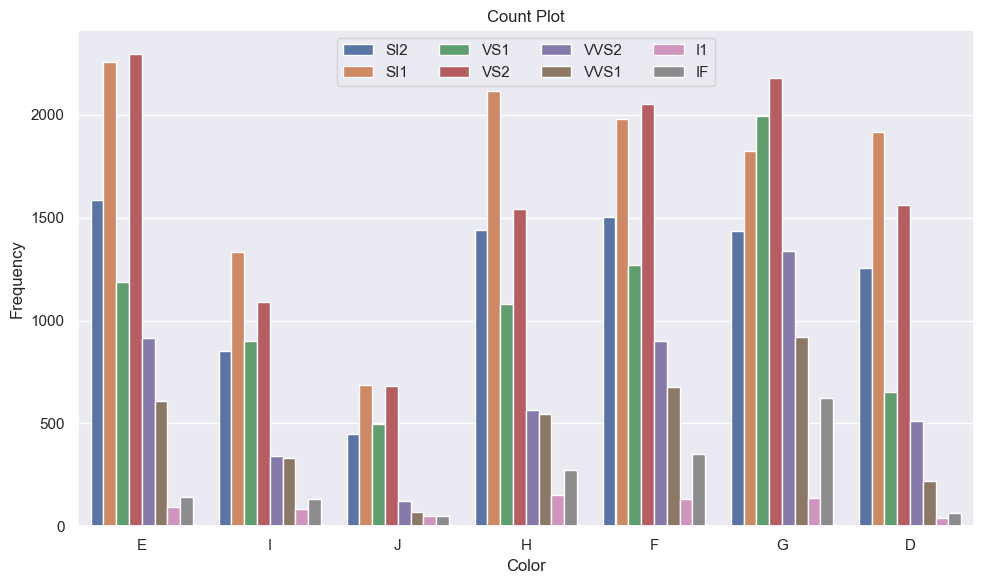

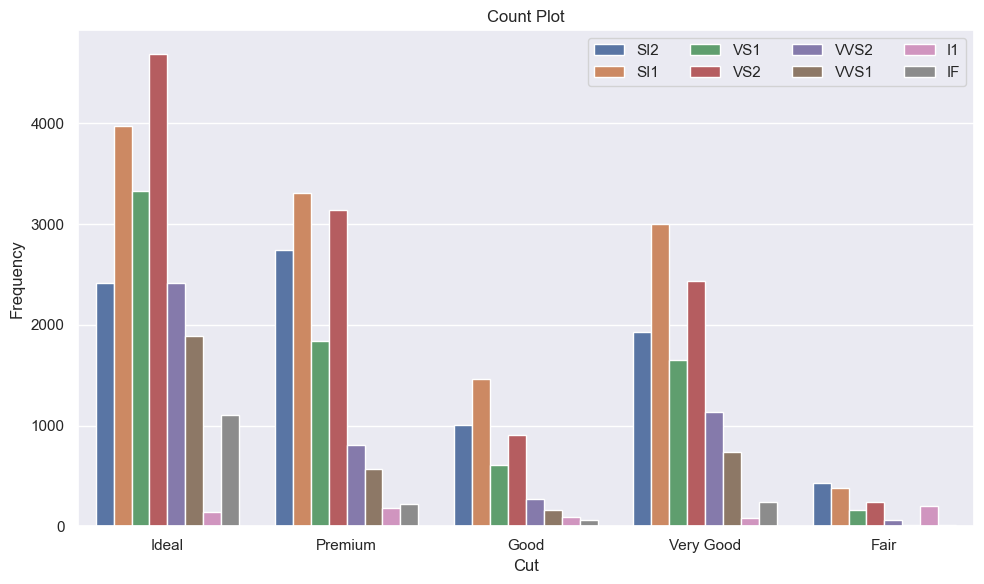

In [8]:
# Visualize Count plot
def plot_categorical(x, hue, data, z):
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x, hue=hue, data=data)
    plt.legend(ncol=z)
    plt.title('Count Plot')
    plt.ylabel('Frequency')
    plt.xlabel(title(x))

    plt.tight_layout()
    plt.show()

# Apply plot_categorical Function on Some Columns
plot_categorical(x='color', hue='cut', data=df, z=2)
plot_categorical(x='color', hue='clarity', data=df, z=4)
plot_categorical(x='cut', hue='clarity', data=df, z=4)

## Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
stc = StandardScaler()

stc_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
dum_cols = ['cut', 'color', 'clarity']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [18]:
from sklearn.model_selection import train_test_split 

x = df.drop(['price'], axis=1)
y = df['price']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
#Importing the Libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [ ]:
# List of Models to Try
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('XGB Regressor', XGBRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Linear Regression: Mean Squared Error = 0.074, R-squared = 0.923
Ridge Regression: Mean Squared Error = 0.074, R-squared = 0.923
Decision Tree: Mean Squared Error = 0.035, R-squared = 0.964
Random Forest: Mean Squared Error = 0.018, R-squared = 0.981
Gradient Boosting: Mean Squared Error = 0.03, R-squared = 0.969
K-Nearest Neighbors: Mean Squared Error = 0.037, R-squared = 0.961
XGB Regressor: Mean Squared Error = 0.018, R-squared = 0.981


In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

XGB Regressor: Mean Squared Error = 0.018, R-squared = 0.981


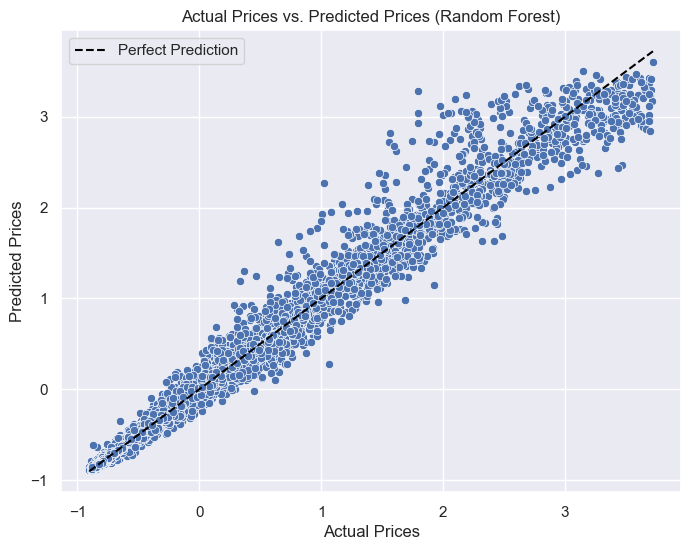

In [ ]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Random Forest)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

### Summary and Conclusion for Diamond Price Prediction Dataset

In this project, our objective was to predict diamond prices using a given dataset. The steps involved in the data preprocessing and model training are detailed below:

1. Data Cleaning:
   - The dataset was already clean and did not require any specific data cleaning operations.

2. Data Visualization:
   - Comprehensive data visualizations were performed using various methods to gain insights and identify patterns within the data. These visualizations helped in understanding the relationships between different features and their impact on diamond prices.

3. Standardization and Label Encoding:
   - The numerical features were standardized to ensure consistent scaling across all features.
   - Categorical features were label-encoded to convert them into a format suitable for the machine learning model.

4. Model Training:
   - A Random Forest model was trained on the preprocessed data. This model was chosen due to its robustness and ability to handle complex datasets effectively.

5. Model Performance:
   - The trained Random Forest model achieved a high accuracy of 98.1%. This indicates that the model performs exceptionally well in predicting diamond prices based on the given features.

### Conclusion

The project followed a structured approach to handling a diamond price prediction dataset. Given the initial cleanliness of the data, we focused on thorough data visualization, standardization, and label encoding to prepare the data for modeling. The insights gained from the visualizations were instrumental in understanding the data better. The Random Forest model, known for its robustness, proved highly effective in predicting diamond prices, achieving an impressive accuracy of 98.1%.

This methodology underscores the importance of data visualization and preprocessing, even when the data is already clean, as it provides valuable insights that enhance model performance. The successful application of the Random Forest model in this project demonstrates its suitability for similar regression tasks.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com